# Breast Cancer Classification

Breast cancer is cancer that develops from breast tissue. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, fluid coming from the nipple, a newly inverted nipple, or a red or scaly patch of skin. In those with distant spread of the disease, there may be bone pain, swollen lymph nodes, shortness of breath, or yellow skin.



<a id = "2"></a>
# Libraries and Utilities

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
import os


<a id = "3"></a>
# Load and Check Data

In [98]:
data = pd.read_csv('/content/data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As It is Shown there are two unsful column to be dropped

In [99]:
data.drop(["Unnamed: 32","id"], axis = 1, inplace =True)
data = data.rename(columns = {"diagnosis":"target"})
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
column_names = data.columns.tolist()

print(column_names)

['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [101]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


B    357
M    212
Name: target, dtype: int64


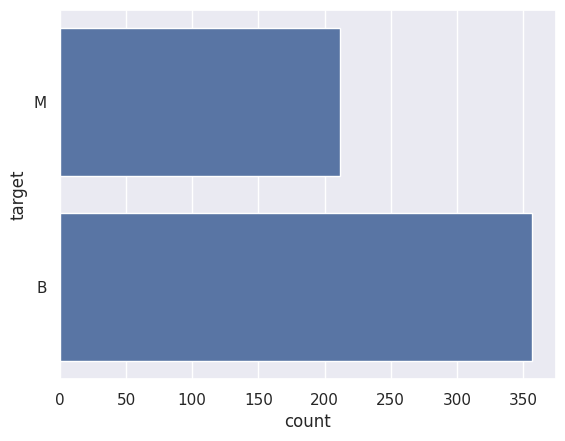

In [102]:
sns.countplot(data["target"])
print(data.target.value_counts())

<a id = "4"></a>
## Malignant to 1 and Bening to 0

In [103]:
data["target"] = [1 if str(i).strip() == "M" else 0 for i in data.target]
print("Data Shape:", data.shape)


Data Shape: (569, 31)


<a id = "5"></a>
# Exploratory Data Analysis

<a id = "6"></a>
## Correlation Map

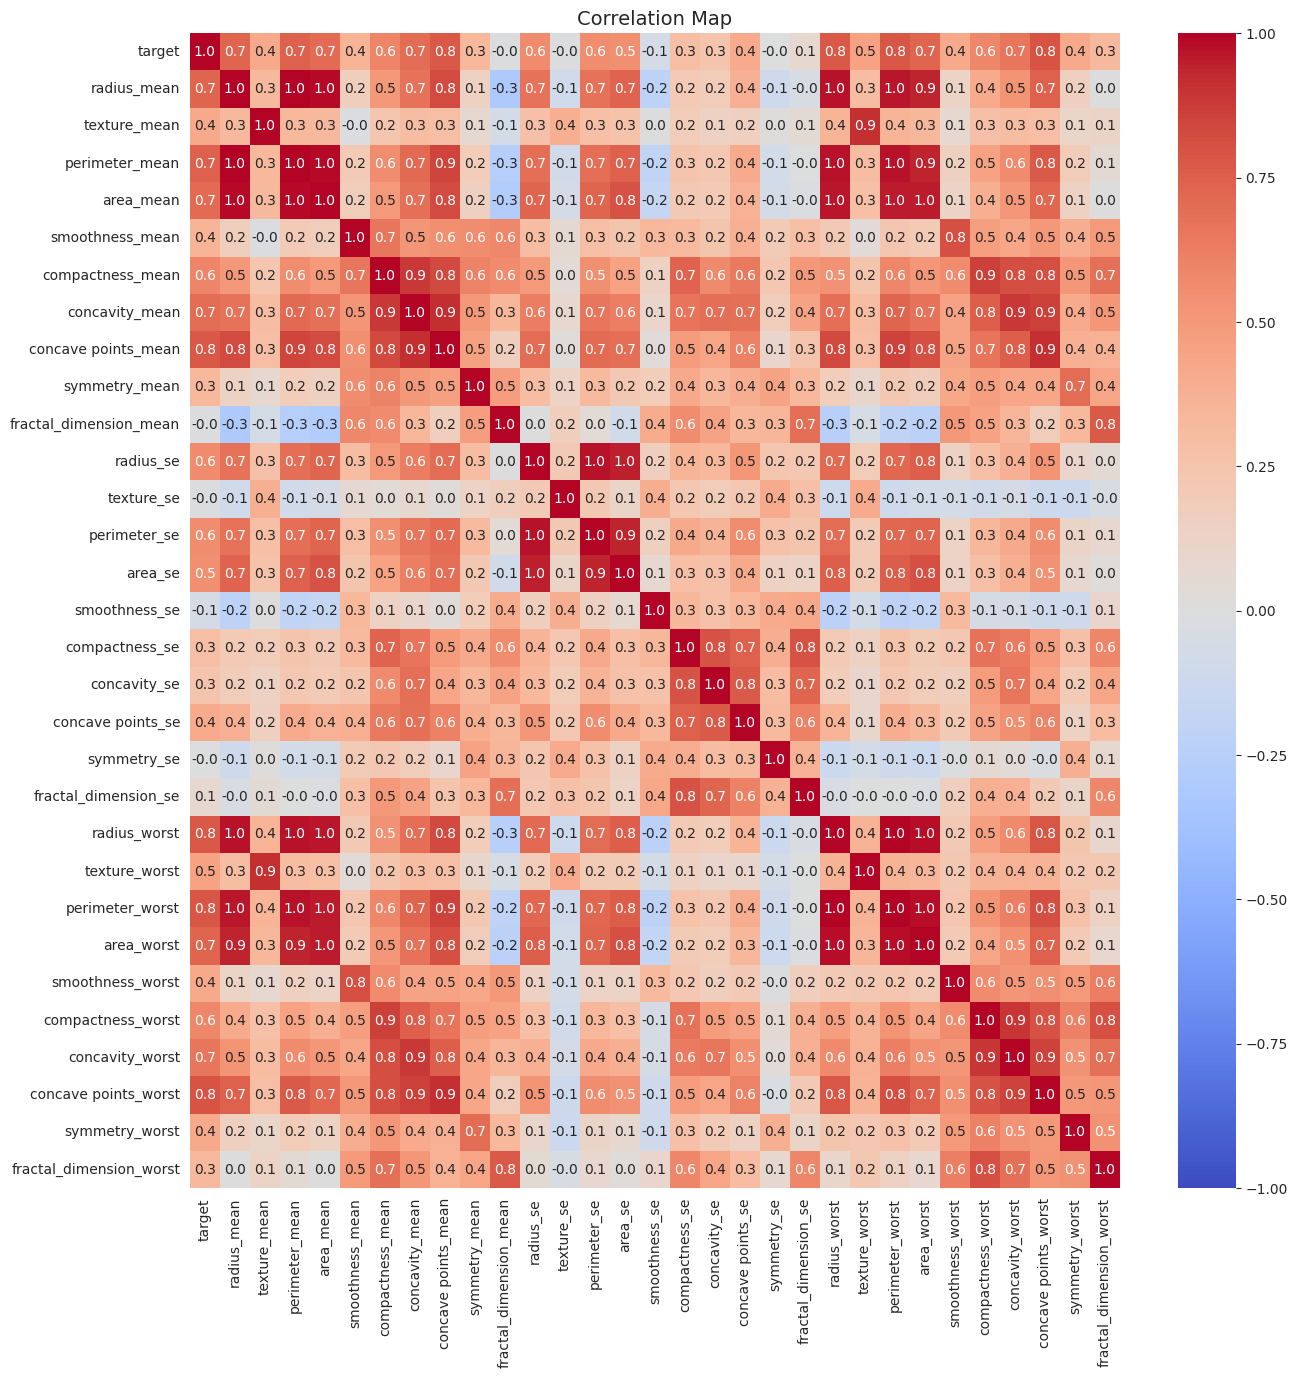

In [9]:
corr_matrix = data.corr()
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(corr_matrix,annot= True,fmt = ".1f",ax=ax,cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map', size = 14)
plt.show()

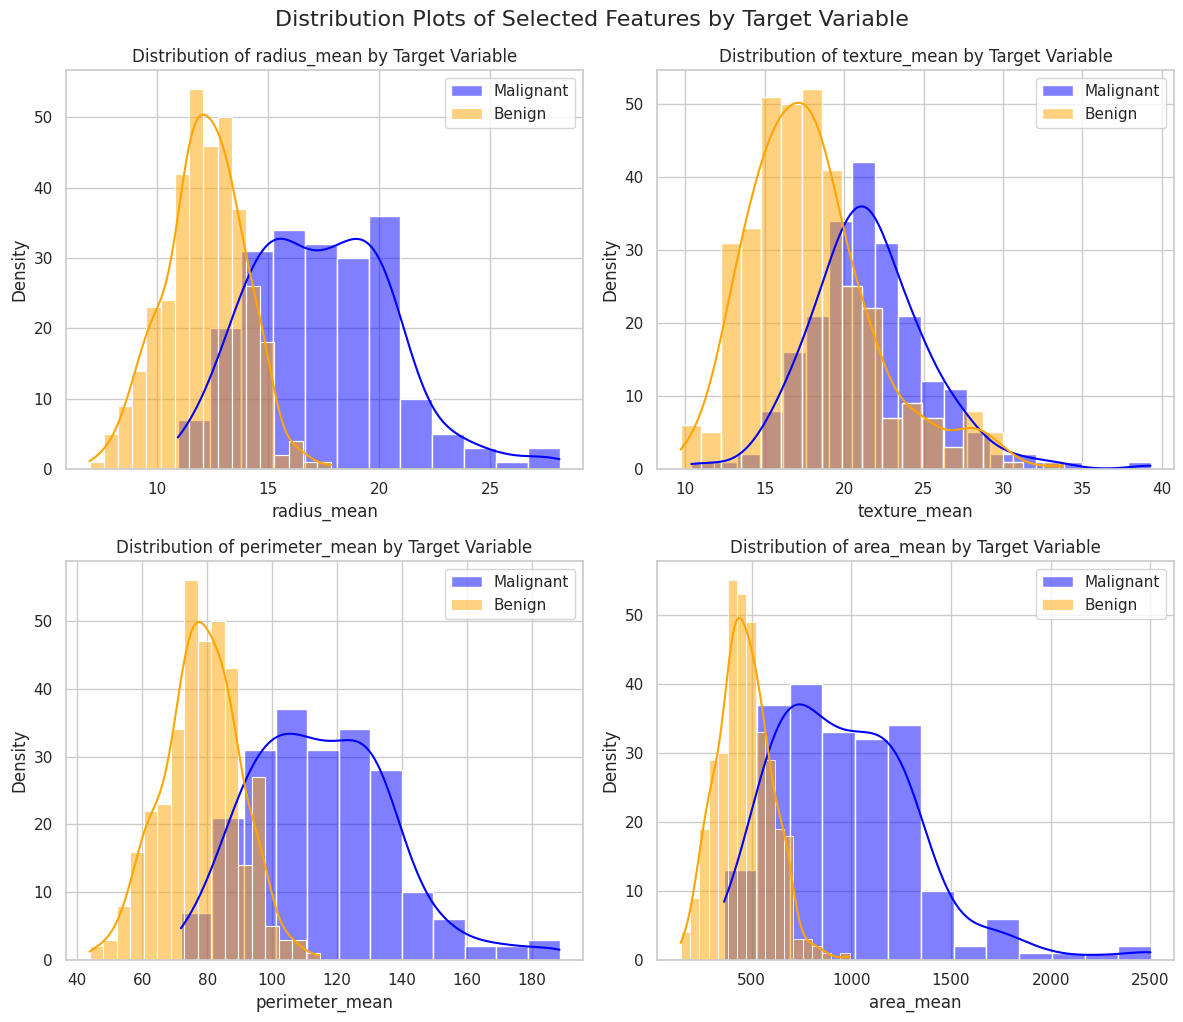

In [104]:
#Visualize the distribution of density of features for both class of points (Two types of cancer)

features_for_distribution = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes = axes.flatten()

for i, feature in enumerate(features_for_distribution):
    sns.histplot(data[data['target'] == 1][feature], color='blue', label='Malignant', kde=True, ax=axes[i])

    sns.histplot(data[data['target'] == 0][feature], color='orange', label='Benign', kde=True, ax=axes[i])

    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {feature} by Target Variable')

    axes[i].legend()

plt.tight_layout()
plt.suptitle('Distribution Plots of Selected Features by Target Variable', y=1.02, size=16)
plt.show()


<a id = "7"></a>
# Outlier Detection

In [105]:
# drop the target column for future calculation as it is not needed and its going to be fitted on our data and its corresponding points
y = data.target
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()
x.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [106]:
# using negative outlier factor for identifying outliers in a way of removing negative valued points using a threshhold value
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score.head()

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936


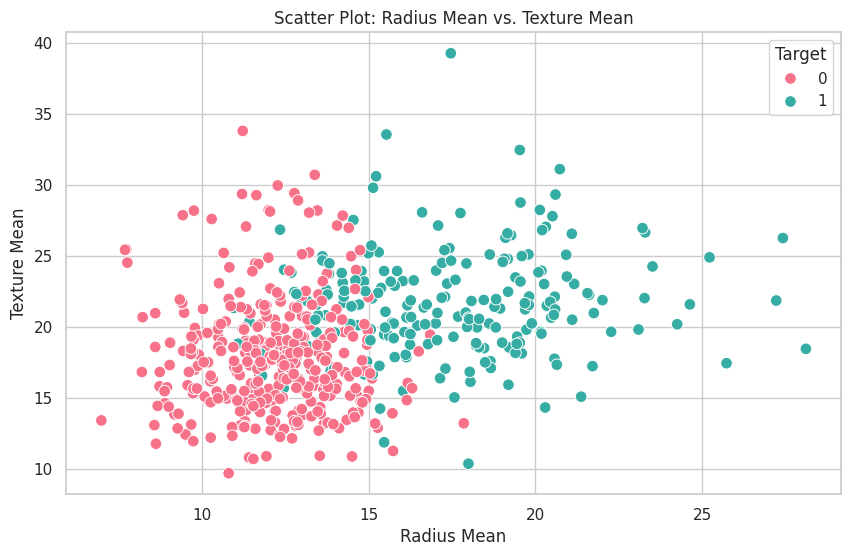

In [107]:
# Create scatter plot for 'radius_mean' against 'texture_mean'

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='target', data=data, palette='husl', marker='o', s=70)
plt.title('Scatter Plot: Radius Mean vs. Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Target', loc='upper right')
plt.show()


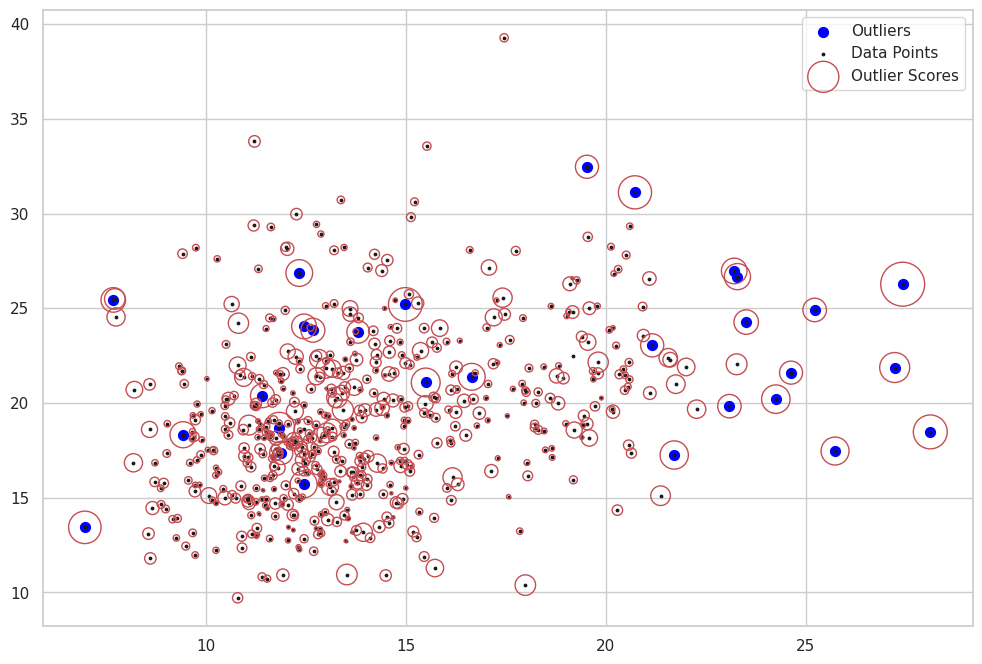

In [108]:
# filtering points according to their negative outlier factor score using a threshold score of -2.5
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
threshold = -1.5
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()
plt.figure(figsize = (12,8))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1], color = "blue", s = 50, label = "Outliers" )
plt.scatter(x.iloc[:,0],x.iloc[:,1], color = "k", s = 3, label = "Data Points" )
plt.scatter(x.iloc[:,0],x.iloc[:,1], s = 1000*radius, edgecolor = "r", facecolors = "none", label ="Outlier Scores")
plt.legend()
plt.show()

<a id = "8"></a>
# Drop Outliers

In [109]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [110]:
x.count()

radius_mean                540
texture_mean               540
perimeter_mean             540
area_mean                  540
smoothness_mean            540
compactness_mean           540
concavity_mean             540
concave points_mean        540
symmetry_mean              540
fractal_dimension_mean     540
radius_se                  540
texture_se                 540
perimeter_se               540
area_se                    540
smoothness_se              540
compactness_se             540
concavity_se               540
concave points_se          540
symmetry_se                540
fractal_dimension_se       540
radius_worst               540
texture_worst              540
perimeter_worst            540
area_worst                 540
smoothness_worst           540
compactness_worst          540
concavity_worst            540
concave points_worst       540
symmetry_worst             540
fractal_dimension_worst    540
dtype: int64

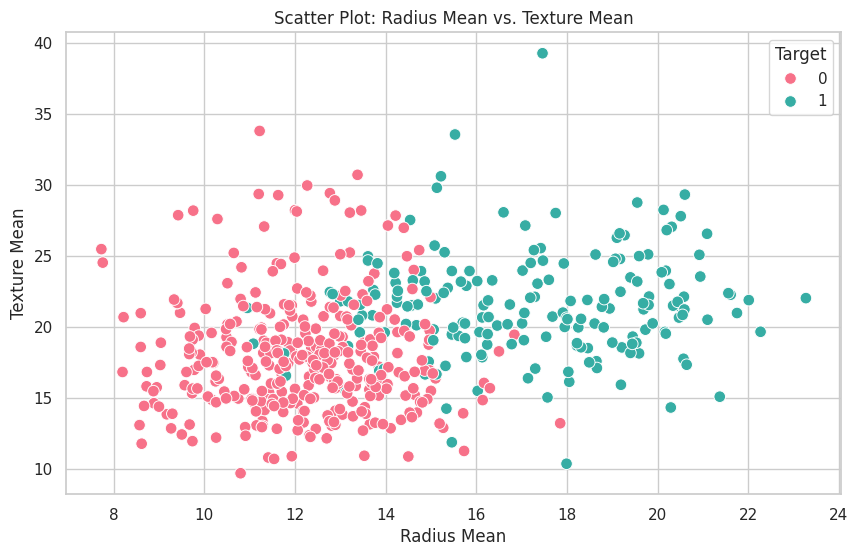

In [111]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue=y, data=x, palette='husl', marker='o', s=70)
plt.title('Scatter Plot: Radius Mean vs. Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Target', loc='upper right')
plt.show()

In [14]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.103889,19.277359,91.801901,651.638908,0.096339,0.104175,0.088316,0.048708,0.181118,0.062809,...,16.234382,25.667201,107.007799,874.644014,0.132363,0.253963,0.271465,0.114346,0.290121,0.083963
std,3.482620,4.294816,23.990829,343.570353,0.014067,0.052710,0.078950,0.038508,0.027418,0.007061,...,4.765587,6.147020,33.083494,551.935984,0.022852,0.157310,0.208092,0.065496,0.061912,0.018073
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.170000,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057775,...,13.010000,21.075000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.835000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061545,...,14.965000,25.405000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282250,0.080050
75%,15.780000,21.785000,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066128,...,18.767500,29.675000,125.175000,1073.500000,0.146025,0.337600,0.381400,0.161325,0.318025,0.092082
max,28.110000,39.280000,188.500000,2499.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a id = "9"></a>
# Train Test Split

In [15]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

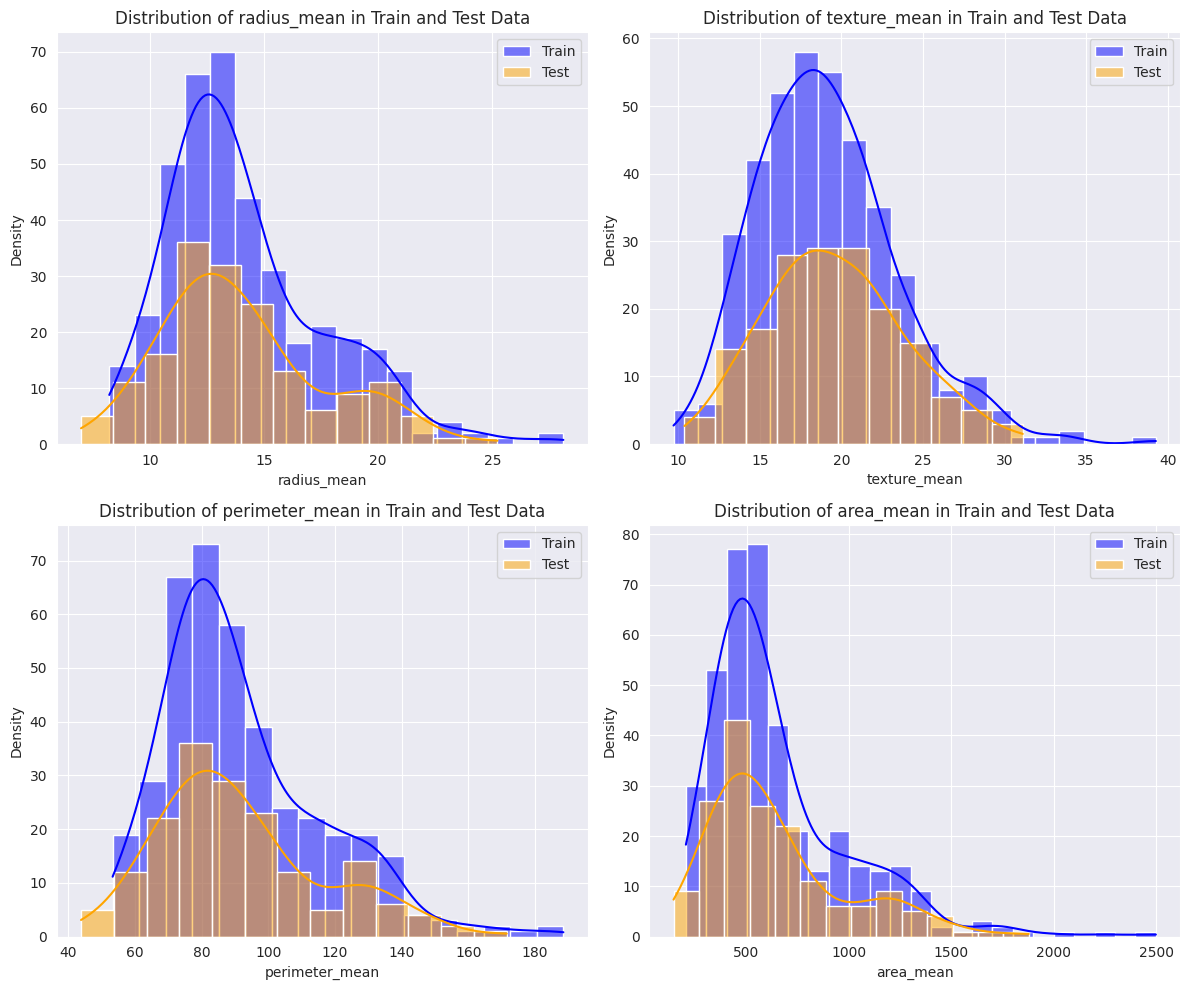

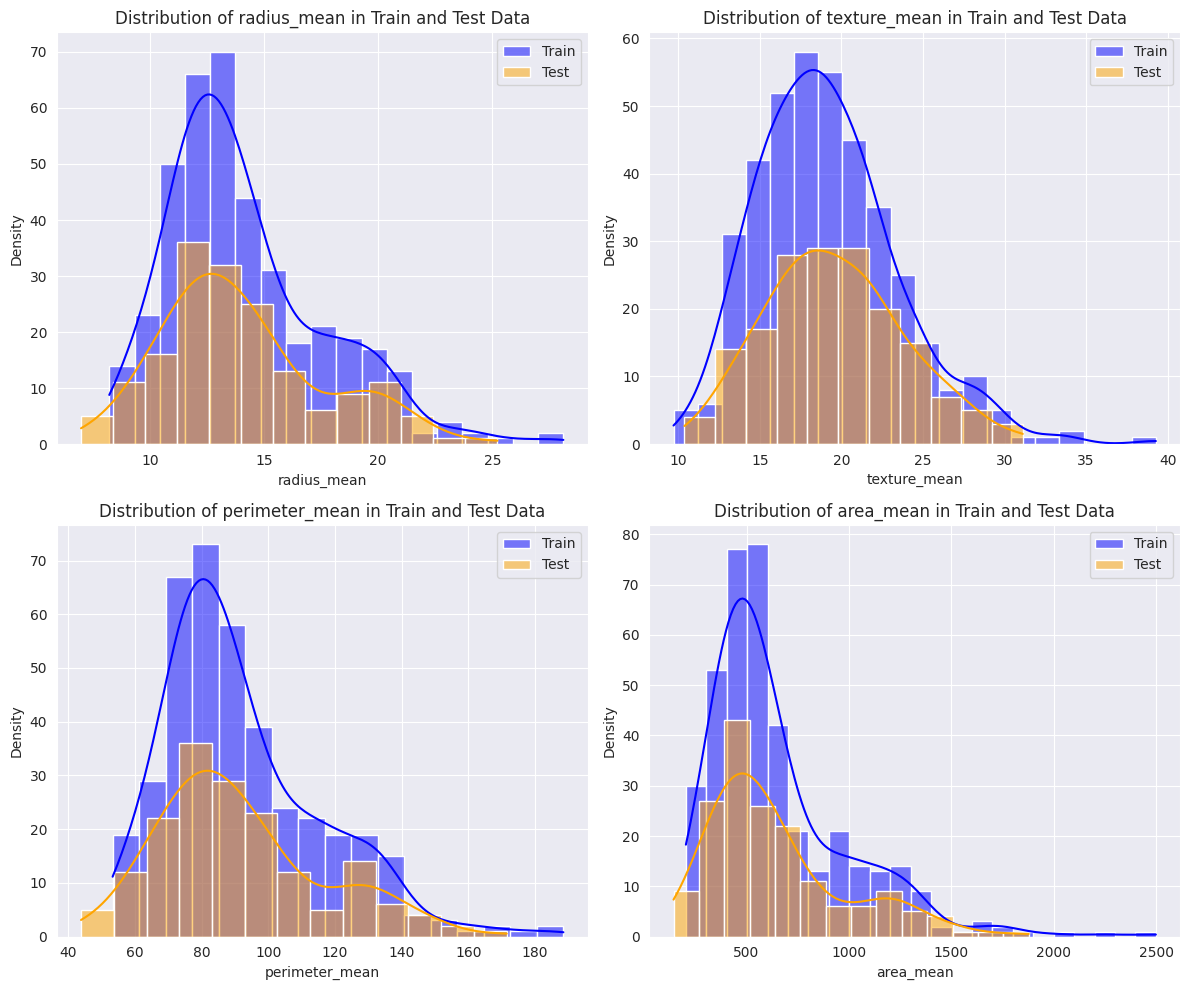

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train and X_test are your training and test datasets
# You can replace them with your actual data

# List of features to compare
features_to_compare = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through features
for i, feature in enumerate(features_to_compare):
    # Plot overlapping histograms
    sns.histplot(X_train[feature], color='blue', label='Train', kde=True, ax=axes[i])
    sns.histplot(X_test[feature], color='orange', label='Test', kde=True, ax=axes[i])

    # Add labels and title
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {feature} in Train and Test Data')

    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train and X_test are your training and test datasets
# You can replace them with your actual data

# List of features to compare
features_to_compare = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through features
for i, feature in enumerate(features_to_compare):
    # Plot overlapping histograms
    sns.histplot(X_train[feature], color='blue', label='Train', kde=True, ax=axes[i])
    sns.histplot(X_test[feature], color='orange', label='Test', kde=True, ax=axes[i])

    # Add labels and title
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {feature} in Train and Test Data')

    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<a id = "10"></a>
# Standardization

In [112]:
# as KNN uses distances if feature for classification and there are various dimensions here, standard the values for this purpose , so there is no dimension
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
x_train_df = pd.DataFrame(X_train, columns = columns)
x_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.126206,-0.106331,-0.139113,-0.243152,0.200584,0.082163,-0.426589,-0.287204,-0.345793,0.802295,...,-0.243869,0.026662,-0.235439,-0.316803,0.456859,0.060010,-0.359469,0.218125,-0.054096,0.396185
1,1.110155,0.350378,1.085508,0.972350,0.516224,0.541814,0.433900,1.051074,0.668203,-0.276397,...,1.026425,-0.008771,0.960829,0.869669,0.705777,0.841678,0.340937,1.293014,0.281891,0.093907
2,-1.565931,-0.763715,-1.524658,-1.225782,1.326652,-0.408721,-0.589335,-0.780730,-0.582878,1.903286,...,-1.410326,-0.941303,-1.316628,-1.082299,1.762589,-0.075060,-0.092330,-0.146403,0.068515,1.048258
3,0.567081,-0.251647,0.550500,0.456043,0.061958,0.213772,0.101004,0.286230,0.190385,-0.026932,...,0.779600,-0.031319,0.679317,0.656981,-0.027877,-0.160648,0.085079,0.112194,-0.144860,-0.103605
4,-0.487293,0.172769,-0.488764,-0.531209,-0.840888,-0.027839,-0.238905,-0.468792,-0.101412,-0.025539,...,-0.594955,-0.385649,-0.585008,-0.592932,-1.180763,-0.212804,-0.375364,-0.594274,-0.315243,-0.329168


In [113]:
x_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02
mean,2.013503e-17,-2.953137e-16,-5.369341e-17,-2.237225e-16,-3.803283e-17,-2.192481e-16,4.474450e-17,7.159121e-17,-1.657784e-15,6.700490e-16,...,1.566058e-16,-4.608684e-16,-4.541567e-16,-6.487953e-17,6.577442e-16,-1.118613e-16,8.054011e-17,-7.159121e-17,-5.481202e-17,4.027005e-17
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,...,-1.554165e+00,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,...,-6.821946e-01,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,...,-2.715302e-01,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,...,4.880926e-01,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,...,3.590418e+00,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00


<a id = "11"></a>
# Basic KNN Method

In [115]:
knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(X_train,Y_train)
y_pred =  knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
print("Score:", score)
print("CM:", cm)
print("Basic KNN Accuracy:", acc)

Score: 0.9532163742690059
CM: [[108   1]
 [  7  55]]
Basic KNN Accuracy: 0.9532163742690059


<a id = "12"></a>
## Finding Best KNN Parameters

In [116]:
# DEfine a KNN model with grid function , the utility is that it prevents futre retyping the same syntaxes as it gonna be used several times.
def KNN_Best_Params(x_train, x_test, y_train,y_test):

    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)

    print("Best Training Score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test Score: {}, Train Score: {}".format(acc_test,acc_train))

    print()

    print("CM Test:" ,cm_test)
    print("CM Train:", cm_train)

    return grid

In [ ]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best Training Score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test: [[107   2]
 [  5  57]]
CM Train: [[248   0]
 [  9 140]]


<a id = "13"></a>
# Principal Component Analysis

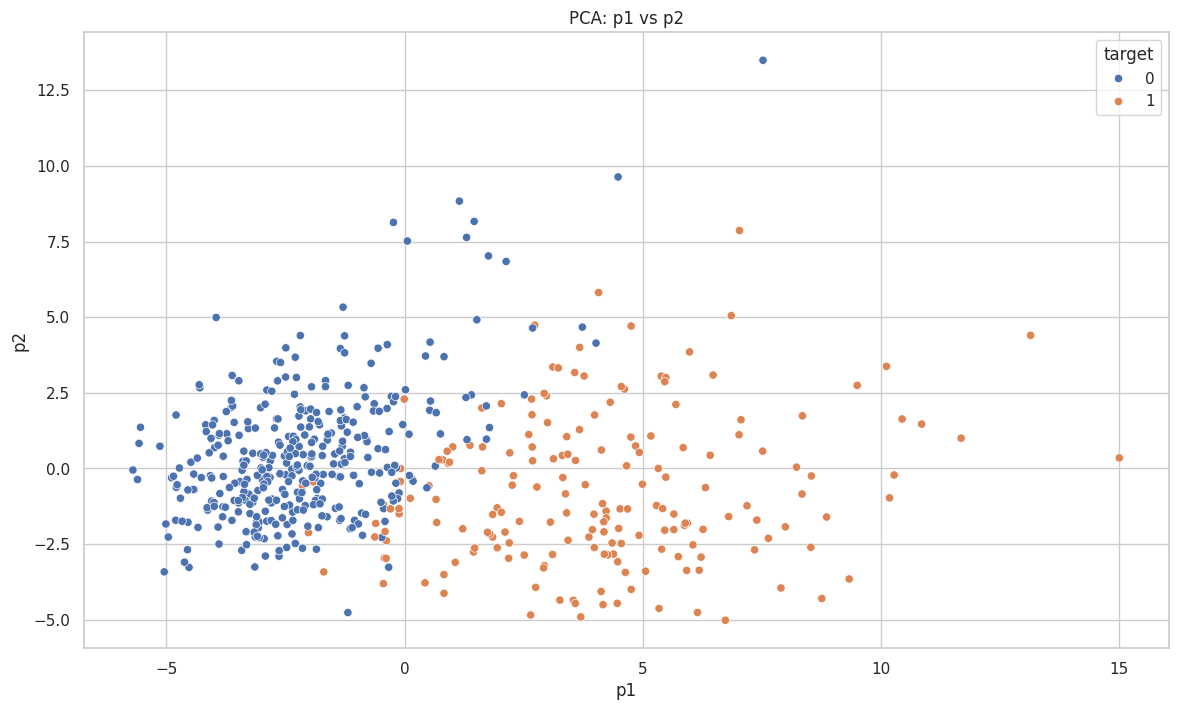

In [117]:
# using pca model to reduce the dimension of our data as it makes it hard to calculate,also gonna reduce our accurasy !
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y

plt.figure(figsize = (14,8))
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")
plt.show()

In [118]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y,test_size = test_size, random_state = 42)
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best Training Score: 0.9493598862019914 with parameters: {'n_neighbors': 13, 'weights': 'uniform'}

Test Score: 0.9074074074074074, Train Score: 0.9629629629629629

CM Test: [[103   3]
 [ 12  44]]
CM Train: [[242   5]
 [  9 122]]


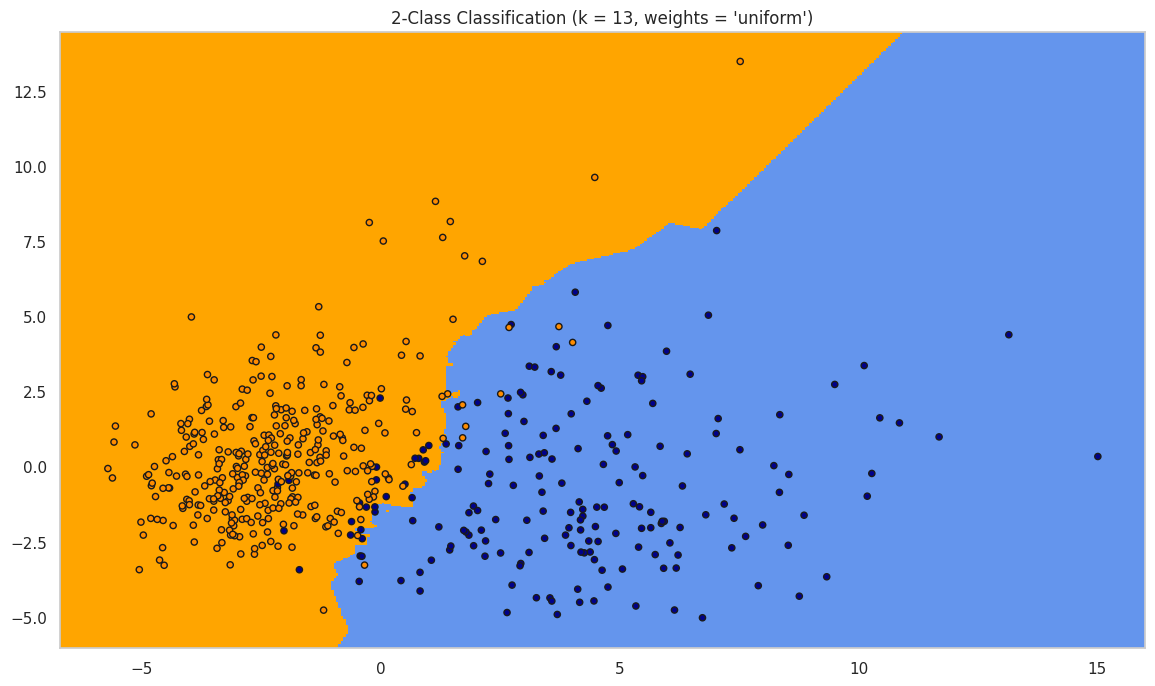

In [119]:
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', "darkblue"])

h = 0.05
X = X_reduced_pca
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min,y_max,h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,8))
plt.pcolormesh(xx,yy,Z, cmap = cmap_light)

plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,
           edgecolor = 'k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class Classification (k = %i, weights = '%s')"
         % (len(np.unique(y)), grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()

<a id = "14"></a>
# Neighborhood Component Analysis (NCA)

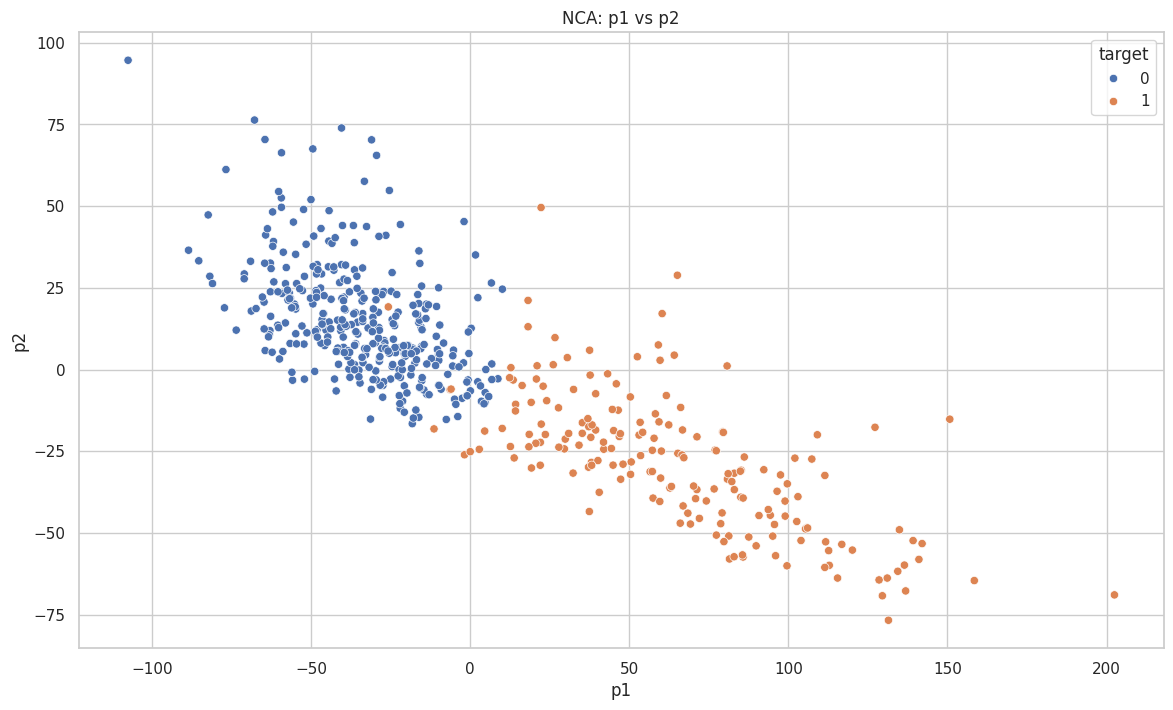

In [120]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
plt.figure(figsize = (14,8))
sns.scatterplot(x = "p1", y= "p2", hue = "target", data = nca_data )
plt.title("NCA: p1 vs p2")
plt.show()

In [121]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y,test_size = test_size, random_state = 42)
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best Training Score: 0.9921052631578947 with parameters: {'n_neighbors': 6, 'weights': 'distance'}

Test Score: 0.9876543209876543, Train Score: 1.0

CM Test: [[106   0]
 [  2  54]]
CM Train: [[247   0]
 [  0 131]]


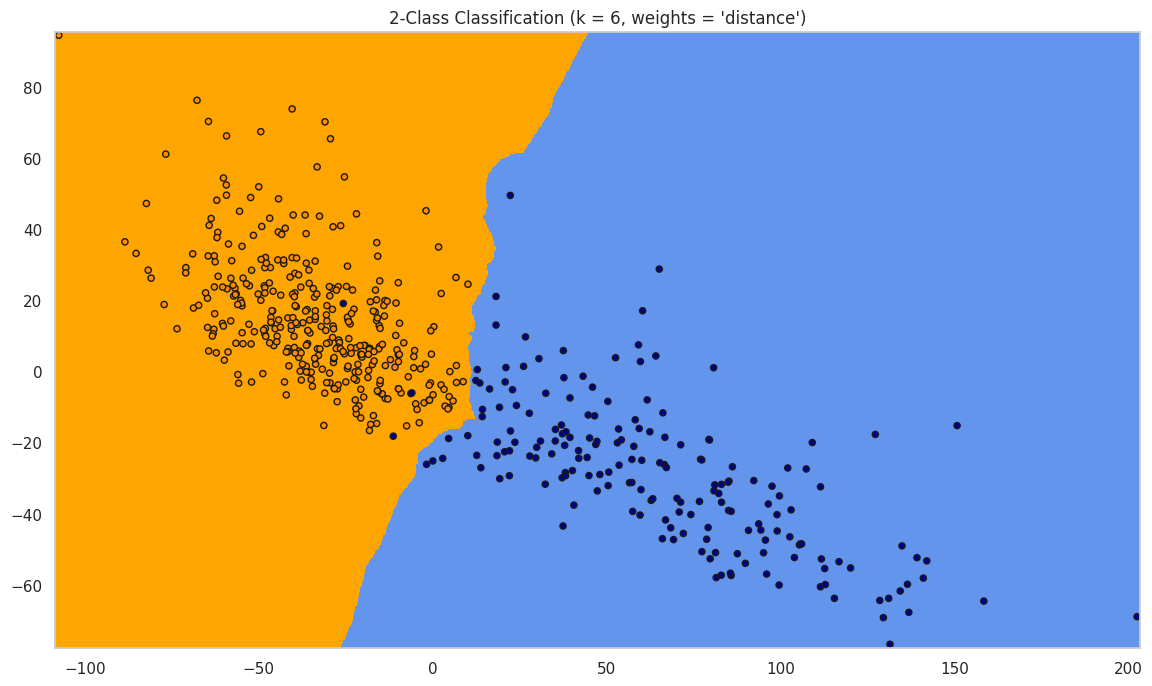

In [122]:
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', "darkblue"])
h = 0.35
X = X_reduced_nca
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min,y_max,h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,8))
plt.pcolormesh(xx,yy,Z, cmap = cmap_light)

plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,
           edgecolor = 'k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class Classification (k = %i, weights = '%s')"
         % (len(np.unique(y)), grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights));